#           HANDWRITTEN CHARACTER RECOGNITION PROJECT

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Creating Dataset

In [2]:
# Dictionary for defining characters into numeric labels as machine can work on numeric data
classes = {}

# Adding digits to classes with their respective labels
for i in range(48, 58):
    classes[chr(i)] = i-48
    
# Adding Upper Case English Alphabets to classes with their respective labels
for i in range(65, 91):
    classes[chr(i)] = i-55

# Adding Lower Case English Alphabets to classes with their respective labels
for i in range(97, 123):
    classes[chr(i)] = i-61

# Printing all labels with their respective character
print(classes)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}


In [3]:
# Importing os library for storing accessing directory of dataset images
import os

# Image dataset folder path
path = 'C:/Users/chaud/jupyter files/Characters'

# Storing dataset images name in images list
characters = os.listdir(path)

In [5]:
!pip install opencv-python

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)


In [6]:
# Importing cv2 for reading pixel values of images
import cv2

#Defining lists for storing

# list CH for storing array of character image pixel values
CH = []
# list LABEL for storing target label for their corresponding image values
LABEL = []

# Loop for every image in images list
for file in characters:
    images = os.listdir(path+'/'+file+'/')
    for img in images:
        # Adding array of image pixel values after resizing resolution as height 32 * width 32
        CH.append(cv2.resize(cv2.imread(path+'/'+file+'/'+img, 0), (32, 32)))
        # Adding respective label for images
        LABEL.append(classes[chr(int(file))])

Dataset CREATED!

In [7]:
# Checking no. of images for every character
charImages = pd.Series(LABEL).value_counts()

In [8]:
print(charImages)

40    9892
28    8660
47    8411
55    7221
1     6008
      ... 
16     393
41     392
60     390
51     371
45     347
Length: 62, dtype: int64


In [9]:
#LABELDATA = pd.DataFrame(LABEL).replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61],['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'])

In [10]:
# Print graph for no. of images of every character
'''import seaborn as sns
plt.figure(figsize=(30,10))
plt.xlabel('Characters')
plt.ylabel('Number of Sample Images')
plt.plot(LABELDATA[0].value_counts(), kind='bar')
fig, ax = plt.subplots()
plt.show'''

"import seaborn as sns\nplt.figure(figsize=(30,10))\nplt.xlabel('Characters')\nplt.ylabel('Number of Sample Images')\nplt.plot(LABELDATA[0].value_counts(), kind='bar')\nfig, ax = plt.subplots()\nplt.show"

In [11]:
# Checking size of character images
CH[0].shape

(32, 32)

We have images of size 32*32 pixels

In [12]:
# Converting python lists to numpy arrays for better usage
CH = np.array(CH)
ORIGINAL = CH
LABEL = np.array(LABEL)

Lets check a sample with its label.

Label :  39


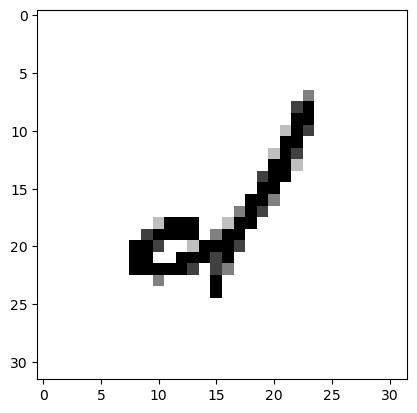

In [13]:
plt.imshow(CH[111], cmap='gray')
print('Label : ', LABEL[111])

## Preparing Data

In [14]:
# Checking shape of CH array
print('Shape of CH array : ', CH.shape)

Shape of CH array :  (163014, 32, 32)


Size of our character array is 3-dimensional.
But ML models work on two-dimensional data.
So lets reduce array size to 2-dimensional.

In [15]:
# Converting 3D array to 2D array
CH = CH.reshape(len(CH),-1)

In [16]:
# Again checking shape of CH array
print('Shape of CH array : ', CH.shape)

Shape of CH array :  (163014, 1024)


Now it is 2D.

## Splitting data into training and testing

In [17]:
chtrain, chtest, labeltrain, labeltest = train_test_split(CH, LABEL, test_size = 0.3, random_state = 10)

In [18]:
# SHAPE OF TRAINING AND TESTING DATA
print('Training Data Shape : ', '\n\tCharacter Array Shape : ', chtrain.shape, '\n\tLabel Array Shape :\t', labeltrain.shape)
print()
print('Testing Data Shape : ', '\n\tCharacter Array Shape : ', chtest.shape, '\n\tLabel Array Shape :\t', labeltest.shape)

Training Data Shape :  
	Character Array Shape :  (114109, 1024) 
	Label Array Shape :	 (114109,)

Testing Data Shape :  
	Character Array Shape :  (48905, 1024) 
	Label Array Shape :	 (48905,)


## Feature Scaling

In [19]:
# Finding maximum value in character data
print(chtrain.max())

255


In [20]:
# Scaling data according to maximum value
chtrain = chtrain/255
chtest = chtest/255

In [21]:
# Now checking maximum value
print(chtrain.max())

1.0


As we can see, image pixel values have reduced to maximum value 1. Since values are divided therefore values have converted to float.

## Feature Selection using PCA (Principal Component Analysis)

In [22]:
# Importing PCA from sci-kit learn library
from sklearn.decomposition import PCA

In [23]:
# Shape of image data before applying PCA
print('Image Training Data Shape :\t', chtrain.shape)
print('Image Testing Data Shape :\t', chtest.shape)

Image Training Data Shape :	 (114109, 1024)
Image Testing Data Shape :	 (48905, 1024)


In [24]:
# Defining PCA for 96% details
pca = PCA(0.96)

# Transforming data according to PCA
# fit_transform for learning parameters from training data and transforming training data accordingly
# combination of fit() and transform()
chtrain = pca.fit_transform(chtrain)
# transforming testing data according to parameters learned from training data
chtest = pca.transform(chtest)

In [25]:
# Lets check pca components and features
print('PCA Components :', pca.n_components)
print('PCA Features :\t', pca.n_features_)

PCA Components : 0.96
PCA Features :	 1024


In [26]:
# Shape of image data after applying PCA
print('Image Training Data Shape :\t', chtrain.shape)
print('Image Testing Data Shape :\t', chtest.shape)

Image Training Data Shape :	 (114109, 157)
Image Testing Data Shape :	 (48905, 157)


## Decoding Class

In [27]:
# Dictionary for defining characters into numeric labels as machine can work on numeric data
decode = {}

# Adding digits to classes with their respective labels
for i in range(48, 58):
    decode[i-48] = chr(i)
    
# Adding Upper Case English Alphabets to classes with their respective labels
for i in range(65, 91):
    decode[i-55] = chr(i)

# Adding Lower Case English Alphabets to classes with their respective labels
for i in range(97, 123):
    decode[i-61] = chr(i)

# Printing all labels with their respective character
print(decode)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z'}


## Copying and Merging training and testing data for calculating overall accuracy

In [28]:
chardata = np.concatenate((chtrain, chtest))
labeldata = np.concatenate((labeltrain, labeltest))

# APPLYING MODELS

## 1. Logistic Regression

In [32]:
# Importing Logistic Regression Model
from sklearn.linear_model import LogisticRegression

### i. Fitting Model

In [33]:
# Creating an object of model
log_model = LogisticRegression(solver='saga', max_iter=5000)

# Fitting model on training data
log_model.fit(chtrain, labeltrain)

LogisticRegression(max_iter=5000, solver='saga')

### ii. Predicting data

In [34]:
# Predicting training data
labeltrain_pred = log_model.predict(chtrain)

# Predicting testing data
labeltest_pred = log_model.predict(chtest)

### iii. Evaluation

In [35]:
# Evaluating Training Accuracy
print('Training Accuracy =\t', accuracy_score(labeltrain, labeltrain_pred))

# Evaluating Testing Accuracy
print('Testing Accuracy =\t', accuracy_score(labeltest, labeltest_pred))

Training Accuracy =	 0.6849941722388243
Testing Accuracy =	 0.6728146406297925


## 2. Random Forest

In [36]:
# Importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier

### i. Fitting Model

In [37]:
random_forest = RandomForestClassifier(n_estimators=80, random_state=42)
random_forest.fit(chtrain, labeltrain)

RandomForestClassifier(n_estimators=80, random_state=42)

### ii. Predicting data

In [38]:
# Predicting training data
labeltrainpred = random_forest.predict(chtrain)

# Predicting testing data
labeltestpred = random_forest.predict(chtest)

### iii. Evaluation

In [39]:
# Evaluating Training Accuracy
print('Random Forest Training Accuracy Score:\t',random_forest.score(chtrain, labeltrain))

# Evaluating Testing Accuracy
print('Random Forest Testing Accuracy Score:\t',random_forest.score(chtest, labeltest))

Random Forest Training Accuracy Score:	 0.9956883330850327
Random Forest Testing Accuracy Score:	 0.7176566813209283


# MODELS COMPARISON

In [40]:
# Evaluating Logistic Regression Accuracy
print('Logistic Regression Overall Accuracy =\t', log_model.score(chardata, labeldata))

# Evaluating Random Forest Accuracy
print('Random Forest Overall Accuracy =\t', random_forest.score(chardata, labeldata))

Logistic Regression Overall Accuracy =	 0.6813402529844063
Random Forest Overall Accuracy =	 0.9122774731004699


Here, we can clearly see that RANDOM FOREST is far BETTER than LOGISTIC REGRESSION.
Because we have 62 classes which can be better handled using RANDOM FOREST.

# PREDICT LABEL OF TEST IMAGES USING MODEL

In [41]:
plt.rcParams['figure.figsize'] = [2, 2]

In [43]:
os.listdir(r'C:\Users\chaud\jupyter files\Test')

['hsf_0_00004.png',
 'hsf_0_00009.png',
 'hsf_0_00010.png',
 'hsf_0_00017.png',
 'hsf_0_00018.png',
 'hsf_0_00020.png',
 'hsf_0_00021.png',
 'hsf_0_00023.png',
 'hsf_0_00043.png',
 'hsf_0_00094.png']

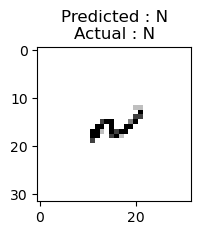

In [47]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files\Test/hsf_0_00004.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : N')
plt.imshow(testimage, cmap='gray')

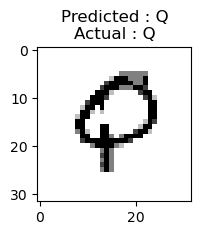

In [49]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files\Test/hsf_0_00009.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : Q')
plt.imshow(testimage, cmap='gray')

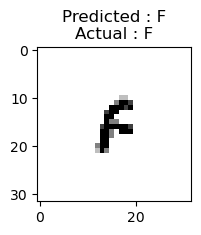

In [51]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files\Test/hsf_0_00010.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : F')
plt.imshow(testimage, cmap='gray')

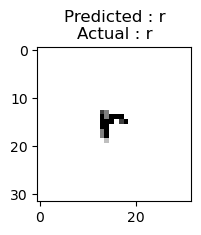

In [53]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files\Test/hsf_0_00017.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : r')
plt.imshow(testimage, cmap='gray')

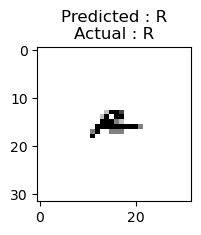

In [55]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files\Test/hsf_0_00018.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : R')
plt.imshow(testimage, cmap='gray')

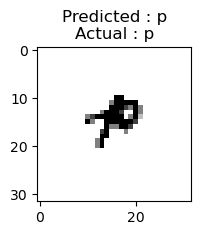

In [57]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files\Test/hsf_0_00020.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : p')
plt.imshow(testimage, cmap='gray')

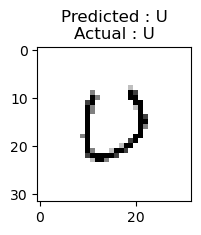

In [59]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files\Test/hsf_0_00021.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : U')
plt.imshow(testimage, cmap='gray')

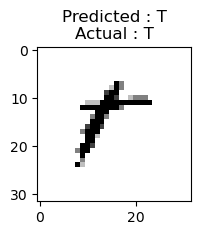

In [61]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files\Test/hsf_0_00023.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : T')
plt.imshow(testimage, cmap='gray')

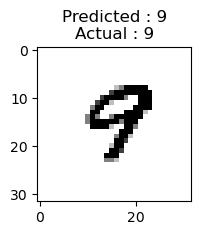

In [63]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files\Test/hsf_0_00043.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : 9')
plt.imshow(testimage, cmap='gray')

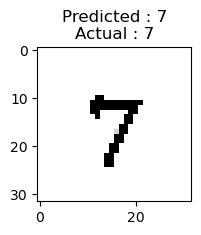

In [64]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files/Test/img008-048.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : 7')
plt.imshow(testimage, cmap='gray')

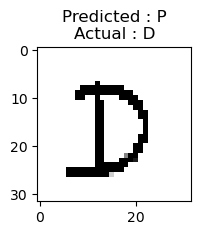

In [66]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files/Test/img014-012.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : D')
plt.imshow(testimage, cmap='gray')

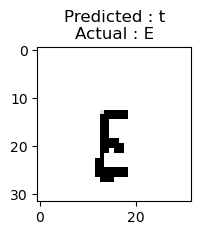

In [67]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files/Test/img015-017.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : E')
plt.imshow(testimage, cmap='gray')

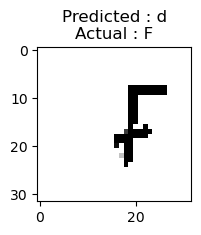

In [68]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files/Test/img016-049.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : F')
plt.imshow(testimage, cmap='gray')

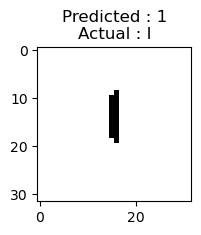

In [70]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files/Test/img019-005.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : I')
plt.imshow(testimage, cmap='gray')

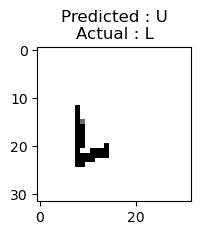

In [71]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files/Test/img022-011.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : L')
plt.imshow(testimage, cmap='gray')

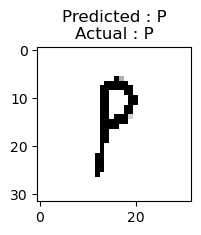

In [72]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files/Test/img026-038.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : P')
plt.imshow(testimage, cmap='gray')

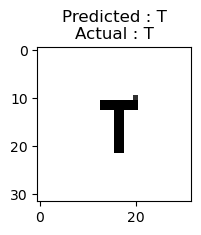

In [74]:
testimage = cv2.resize(cv2.imread(r'C:\Users\chaud\jupyter files/Test/img030-031.png', 0), (32, 32))
testSample = pca.transform([(testimage/255).flatten()])
plt.title('Predicted : '+decode[int(random_forest.predict(testSample))]+'\nActual : T')
plt.imshow(testimage, cmap='gray')

In [76]:
labeldatapred = random_forest.predict(chardata)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(labeldata, labeldatapred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5534
           1       0.92      0.96      0.94      6008
           2       0.89      0.96      0.93      5321
           3       0.91      0.97      0.94      5592
           4       0.88      0.95      0.91      5114
           5       0.91      0.93      0.92      4603
           6       0.92      0.98      0.95      5236
           7       0.93      0.98      0.95      5589
           8       0.89      0.95      0.92      5262
           9       0.91      0.97      0.94      5190
          10       0.93      0.85      0.88      2110
          11       0.98      0.74      0.84      1008
          12       0.93      0.89      0.91      3959
          13       0.98      0.79      0.88      1402
          14       0.99      0.80      0.88      1899
          15       0.91      0.87      0.89      3355
          16       1.00      0.75      0.85       393
          17       1.00    

In [78]:
import joblib

In [79]:
file = "RF_model.joblib"
joblib.dump(random_forest, file)
file1 = 'Log_model.joblib'
joblib.dump(log_model, file1)

['Log_model.joblib']

In [84]:
loaded_model = joblib.load('RF_model.joblib')
result = loaded_model.score(chardata, labeldata)
print(result)

0.9122774731004699
